<a href="https://colab.research.google.com/github/2303A52155/kanukuntla_shailaja/blob/main/GEN_AI__PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RESUME AND COVER LETTER GENERATOR

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,735 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,992 kB]
Fetched 12.0 MB in 2s (6,621 kB/s)
Reading package lists... Done
W: Skipping acquire of configured fi

Dropdown(description='Font Style:', options=('Arial', 'Courier', 'Times', 'Helvetica', 'Symbol', 'ZapfDingbats…

Dropdown(description='Font Size:', index=4, options=(8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), value=…

Please enter the following details:
Enter your name: kanukuntla shailaja
Enter your email: shailaja123@gmail.com
Enter your phone number: 9876543210
Enter your educational background: Bachelor of Technology in Computer Science, Anytown University, 2020
Enter your key technical skills (comma-separated):  Python, JavaScript, React, SQL, Git, AWS, Data Analysis, Machine Learning
Enter the job title you are applying for: Software Engineer
Enter your certifications: AWS Certified Cloud Practitioner
Enter your achievements: Developed a scalable web application that increased user engagement by 20%; Led a team of 3 junior developers on a critical project.
Enter your extra-curricular activities: Member of the University Robotics Club, Volunteer at Local Animal Shelter
Enter your personal strengths:  Problem-solving, Teamwork, Adaptability, Strong Communication
Enter languages known: English, hindi,telugu
Enter your projects (comma-separated):  E-commerce Platform with Payment Gateway, Sentimen

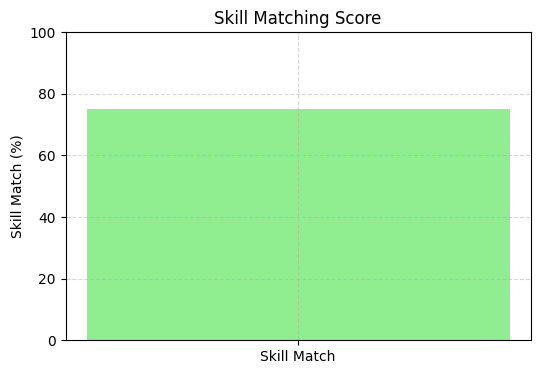

✅ PDF saved successfully: Resume.pdf
✅ PDF saved successfully: Cover_Letter.pdf


In [2]:
!pip install -U sentence-transformers fpdf textblob language-tool-python textstat scikit-learn matplotlib ipywidgets --quiet
!apt-get update
!apt-get install openjdk-17-jdk -y
!java -version
!pip install --upgrade language_tool_python --quiet

from sentence_transformers import SentenceTransformer, util
from fpdf import FPDF
import pandas as pd
from datetime import date
import textstat
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# === Load pre-trained model for Job Fit Score ===
model = SentenceTransformer('all-MiniLM-L6-v2')

# === Enhanced Font Dropdowns ===
font_style_dropdown = widgets.Dropdown(
    options=['Arial', 'Courier', 'Times', 'Helvetica', 'Symbol', 'ZapfDingbats'],
    value='Arial',
    description='Font Style:',
    disabled=False,
)

font_size_dropdown = widgets.Dropdown(
    options=list(range(8, 21)),
    value=12,
    description='Font Size:',
    disabled=False,
)

display(font_style_dropdown)
display(font_size_dropdown)

# === Resume Generator ===
def generate_resume(name, email, phone, education, skills, job_title, certifications, achievements,
                    extracurricular, strengths, languages, projects, internships):
    return f"""
RESUME

--------------------------------
1. PERSONAL DETAILS
--------------------------------
Name: {name}
Email: {email}
Phone: {phone}

--------------------------------
2. CAREER OBJECTIVE
--------------------------------
Seeking a challenging role as a {job_title} to apply my skills and contribute to organizational success.

--------------------------------
3. EDUCATIONAL QUALIFICATIONS
--------------------------------
{education}

--------------------------------
4. TECHNICAL SKILLS
--------------------------------
{skills}

--------------------------------
5. PROJECTS
--------------------------------
{projects}

--------------------------------
6. INTERNSHIPS
--------------------------------
{internships}

--------------------------------
7. CERTIFICATIONS
--------------------------------
{certifications}

--------------------------------
8. ACHIEVEMENTS
--------------------------------
{achievements}

--------------------------------
9. EXTRA-CURRICULAR ACTIVITIES
--------------------------------
{extracurricular}

--------------------------------
10. PERSONAL STRENGTHS
--------------------------------
{strengths}

--------------------------------
11. LANGUAGES KNOWN
--------------------------------
{languages}

--------------------------------
12. DECLARATION
--------------------------------
I hereby declare that all the above details are true to the best of my knowledge.
"""

# === Cover Letter Generator ===
def generate_cover_letter(name, email, phone, job_title, company_name, address, education, skills, achievements):
    today = date.today().strftime("%B %d, %Y")
    return f"""
COVER LETTER

{name}
Email: {email}
Phone: {phone}
Date: {today}

Hiring Manager
{company_name}
{address}

Subject: Application for the Position of {job_title}

Dear Hiring Manager,

I am writing to express my interest in the position of {job_title} at {company_name}. With my educational background in {education} and a strong skill set including {skills}, I am confident in my ability to contribute meaningfully to your team.

Throughout my academic and personal development, I have focused on honing my technical capabilities, particularly in areas relevant to the {job_title} role.

My achievements include {achievements}, which highlight my commitment to excellence and a goal-oriented approach.

I am eager to bring this same energy and determination to {company_name} and grow professionally while contributing to the success of the organization.

Thank you for your time and consideration.

Sincerely,
{name}
"""

# === PDF Exporter Class ===
class PDFExporter:
    def __init__(self, title, font_style='Arial', font_size=12):
        self.pdf = FPDF()
        self.pdf.add_page()
        self.pdf.set_auto_page_break(auto=True, margin=15)
        self.pdf.set_title(title)
        self.font_style = font_style
        self.font_size = font_size
        self.pdf.set_font(self.font_style, size=self.font_size)

    def add_title(self, title):
        self.pdf.set_font(self.font_style, 'B', self.font_size + 2)
        self.pdf.cell(0, 10, txt=title, ln=True, align='C')
        self.pdf.ln(5)

    def add_multiline_text(self, text):
        self.pdf.set_font(self.font_style, size=self.font_size)
        for line in text.split('\n'):
            self.pdf.multi_cell(0, 10, txt=line)
        self.pdf.ln(5)

    def save_pdf(self, filename):
        self.pdf.output(filename)
        print(f"✅ PDF saved successfully: {filename}")

# === Readability Analysis ===
def print_readability_scores(text, label):
    print(f"📄 Readability for {label}:")
    print(" - Flesch Reading Ease:", textstat.flesch_reading_ease(text))
    print(" - Gunning Fog Index:", textstat.gunning_fog(text))
    print(" - SMOG Index:", textstat.smog_index(text))
    print(" - Automated Readability Index:", textstat.automated_readability_index(text))
    print()

# === Skill Matching & Job Fit Score ===
def calculate_job_fit_score(user_skills, job_description):
    user_skills_list = [skill.strip().lower() for skill in user_skills.split(',')]
    job_description_lower = job_description.lower()

    matched_skills = [skill for skill in user_skills_list if skill in job_description_lower]
    total_skills = len(user_skills_list)
    matched_count = len(matched_skills)

    if total_skills == 0:
        return 0, []

    fit_score = round((matched_count / total_skills) * 100, 2)
    return fit_score, matched_skills

# === User Input ===
def get_input(prompt):
    return input(prompt)

print("Please enter the following details:")
name = get_input("Enter your name: ")
email = get_input("Enter your email: ")
phone = get_input("Enter your phone number: ")
education = get_input("Enter your educational background: ")
skills = get_input("Enter your key technical skills (comma-separated): ")
job_title = get_input("Enter the job title you are applying for: ")
certifications = get_input("Enter your certifications: ")
achievements = get_input("Enter your achievements: ")
extracurricular = get_input("Enter your extra-curricular activities: ")
strengths = get_input("Enter your personal strengths: ")
languages = get_input("Enter languages known: ")
projects = get_input("Enter your projects (comma-separated): ")
internships = get_input("Enter your internships (comma-separated): ")
company_name = get_input("Enter the company name: ")
company_address = get_input("Enter the company address: ")
job_description_input = get_input("Paste the job description here: ")

# === Generate Resume and Cover Letter ===
resume_text = generate_resume(name, email, phone, education, skills, job_title, certifications,
                              achievements, extracurricular, strengths, languages, projects, internships)

cover_letter_text = generate_cover_letter(name, email, phone, job_title, company_name,
                                          company_address, education, skills, achievements)

print_readability_scores(resume_text, "Resume")
print_readability_scores(cover_letter_text, "Cover Letter")

# === Skill Match & Score Display ===
job_fit_score, matched_skills = calculate_job_fit_score(skills, job_description_input)

print(f"\n🎯 Job Fit Score: {job_fit_score}%")
print("✅ Matched Skills:", ', '.join(matched_skills) if matched_skills else "None matched")

# === Plot Skill Match Score ===
plt.figure(figsize=(6, 4))
plt.bar(['Skill Match'], [job_fit_score], color='lightgreen')
plt.ylim(0, 100)
plt.ylabel('Skill Match (%)')
plt.title('Skill Matching Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
# === Export Resume as PDF ===
pdf_resume = PDFExporter("Resume", font_style=font_style_dropdown.value, font_size=font_size_dropdown.value)
pdf_resume.add_title("Resume")
pdf_resume.add_multiline_text(resume_text)
pdf_resume.save_pdf("Resume.pdf")

# === Export Cover Letter as PDF ===
pdf_cover = PDFExporter("Cover Letter", font_style=font_style_dropdown.value, font_size=font_size_dropdown.value)
pdf_cover.add_title("Cover Letter")
pdf_cover.add_multiline_text(cover_letter_text)
pdf_cover.save_pdf("Cover_Letter.pdf")